In [2]:
from resnet50 import ResNet50
from keras.preprocessing import image
from imagenet_utils import preprocess_input, decode_predictions
import numpy
from keras.models import Sequential
from keras.layers import Activation, Dropout, Flatten, Dense, Input

from keras.models import Model

Using TensorFlow backend.


In [4]:
input_tensor = Input(shape=(224, 224, 3))
model = ResNet50(weights='imagenet', include_top=False, input_tensor=input_tensor)


K.image_dim_ordering: tf


In [5]:
x = model.output
x = Flatten()(x)
x = Dense(5, init='uniform', name='fc5')(x)



In [6]:
fine_model = Model(input_tensor, x)

for layer in fine_model.layers[:len(fine_model.layers)-1]:
    layer.trainable = False

In [3]:
cd ../ToyLane//

/home/blake/ROSEnvs/catkin_ws/src/ToyLane


In [27]:
import pickle
with open('toy_data_1000.pkl') as f:
    data =pickle.load(f)

In [28]:
data['train'].keys()

['images', 'image_data', 'max', 'affordances', 'min']

In [9]:
fine_model.compile(optimizer='adam',
              loss='mean_squared_error',
              metrics=['mean_absolute_error'])

In [45]:
accuracy_callback = AffordanceAccuracy(data['train'], data['test'])
fine_model.fit(data['train']['image_data'][:10], data['train']['affordances'][:10,:], nb_epoch=10, batch_size=10, callbacks=[accuracy_callback])

Epoch 1/10
logs: {'loss': 0.034188911318778992, 'mean_absolute_error': 0.13288688659667969}
Train Accuracy
(10, 5)
(10, 5)
Test Accuracy
(10, 5)
(10, 5)
10/10 [==============================] - 5s - loss: 0.0342 - mean_absolute_error: 0.1329
Epoch 2/10
logs: {'loss': 0.03361780196428299, 'mean_absolute_error': 0.13996177911758423}
Train Accuracy
(10, 5)
(10, 5)
Test Accuracy
(10, 5)
(10, 5)
10/10 [==============================] - 5s - loss: 0.0336 - mean_absolute_error: 0.1400
Epoch 3/10
logs: {'loss': 0.031673818826675415, 'mean_absolute_error': 0.13579894602298737}


KeyboardInterrupt: 

In [35]:
fine_model.outputs

[<tf.Tensor 'add_69:0' shape=(?, 5) dtype=float32>]

In [44]:
import keras
import numpy as np
class AffordanceAccuracy(keras.callbacks.Callback):
    def __init__(self, train, test, min_absolute_error=2., min_heading_error=1. ):
        super(AffordanceAccuracy,self).__init__()
        self.train=train
        self.test=test
        self.min_absolute_error=min_absolute_error
        self.min_heading_error=min_heading_error
        
    def on_epoch_end(self, epoch, logs={}):
        print "logs: " + str(logs)
        train_pred = self.model.predict(self.train['image_data'][:10])
        test_pred = self.model.predict(self.test['image_data'][:10])
        print "Train Accuracy"
        train_accuracy =  accuracy(self.train['affordances'][:10], train_pred, self.min_absolute_error, self.min_heading_error)
        print "Test Accuracy"
        test_accuracy = accuracy(self.test['affordances'][:10], test_pred, self.min_absolute_error,self. min_heading_error)
        logs['train_accuracy'] = train_accuracy
        logs['test_accuracy'] = test_accuracy
        
def accuracy(y, pred, min_absolute_error=2., min_heading_error=.12):
    print y.shape
    print pred.shape
    heading_accuracy = np.sum((np.abs(y[:,4]-pred[:,4])<min_heading_error)*1.0, axis=0)/y.shape[0]
    displacement_accuracy = np.sum((np.abs(y[:,:4]-pred[:,:4])<min_absolute_error)*1.0, axis=0)/y.shape[0]
    accuracy = np.append(displacement_accuracy, [heading_accuracy])
    return accuracy


In [ ]:
train_pred = fine_model.predict(data['train']['image_data'])

In [203]:
test_pred = fine_model.predict(data['test']['image_data'])

In [102]:
np.rad2deg(y[:,4])

array([  1.87550468e-01,   1.47860098e+00,   9.34678156e-02,
        -3.75095213e-01,   1.17854960e+00,   7.47742525e-01,
         6.42743856e-01,   4.06615552e+00,  -2.81315686e-01,
         4.06423435e+00,   4.68871878e-01,  -3.27137925e+00,
         5.50918101e-01,  -1.86938484e-01,   4.08592653e+00,
         1.87547607e-01,   4.67336226e-01,  -2.89750228e+00,
        -6.72968415e+00,   1.81603408e+00,   1.12529136e+00,
         8.26384157e-01,  -2.25056556e+00,   5.54478188e-01,
        -6.44928498e+00,   1.02814027e+00,   3.70846469e+00,
        -1.02148376e+00,  -3.37585692e+00,   1.10895073e+00,
        -3.07940708e+00,  -6.26234650e+00,   6.54269004e-01,
         3.37034068e+00,   1.76774657e+00,   6.54274709e-01,
         7.47742525e-01,  -3.75094641e+00,   2.99522625e+00,
         3.73868410e-01,   1.26921024e+00,   2.00080471e+00,
         3.80734083e+00,  -4.48646085e+00,  -2.34051113e+00,
        -2.80403447e+00,   4.67339078e-01,  -3.37033728e+00,
         6.42741053e-01,

In [201]:
min_absolute_error=2
min_heading_error_deg=5
print "Train Accuracies [left2, left1, right1, right2, heading]"
print accuracy(data['train']['affordances'], train_pred, min_absolute_error=min_absolute_error, min_heading_error_deg=min_heading_error_deg)
print "Test Accuracies [left2, left1, right1, right2, heading]"
print accuracy(data['test']['affordances'], test_pred, min_absolute_error=min_absolute_error, min_heading_error_deg=min_heading_error_deg)

Train Accuracies [left2, left1, right1, right2, heading]
[ 0.29222222  0.68222222  0.64555556  0.24        0.21444444]
Test Accuracies [left2, left1, right1, right2, heading]
[ 0.15151515  0.51515152  0.43434343  0.42424242  0.21212121]


In [155]:
import numpy as np
import pickle
import Tkinter as tk
%matplotlib inline
import matplotlib.pyplot as plt
%matplotlib inline
import cv2
with open('recording.pkl') as f:
    source = pickle.load(f)
    

In [128]:
def transform_anchor_points(points, M):
    points = np.array(points, dtype=np.float32)
    transformed = cv2.perspectiveTransform(points[None, :, :], M)
    return transformed.tolist()[0]

def compute_topdown_image(image_filename, transformation_matrix, transformation_size):
    img = cv2.imread(image_filename)
    img = cv2.cvtColor(img, cv2.cv.CV_BGR2RGB)
    dst = cv2.warpPerspective(img, transformation_matrix, (transformation_size , transformation_size))
    dst = cv2.cvtColor(dst, cv2.cv.CV_BGR2RGB)
    dst_img = Image.fromarray(dst)
    return dst_img

In [161]:
from PIL import Image, ImageDraw
from matplotlib.pyplot import imshow
import cv2

def display_affordances(source, images, affordances, resized=224,num=10):
    for j in range(num):
        image_file = images[j]
        affordance = affordances[j,:]
        print affordance
        im = compute_topdown_image(image_file, source['front_to_topdown_transformation'], source['transformation_size'])      
        scale = 1.0
        size = im.size[0]
        if resized:        
            scale = resized/float(size)
            im = im.resize((resized,resized), Image.ANTIALIAS)
        draw = ImageDraw.Draw(im)
        center_x = size/2.0 * scale
        width = int(4 *scale)
        for i in range(len(affordance[:4])):
            y = im.size[0] -((i+1)*(10*scale))
            x = center_x-affordance[i]
            draw.line([x, y, center_x, y], fill=150, width=width)

        heading_dx = np.tan(affordance[4])*150
        draw.line([center_x, im.size[0], center_x + heading_dx, im.size[0]-150], fill=200, width=int(4*scale))
        plt.figure()
        imshow(im)



[ 51.05882856  16.14117647 -17.45882353 -48.09411765   0.00327337]


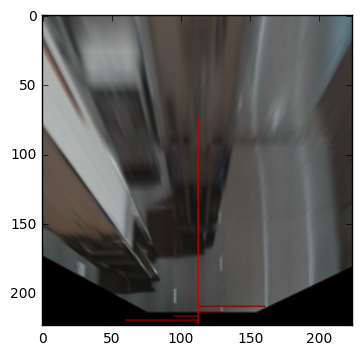

In [181]:
np.set_printoptions(suppress=True)
display_affordances(source,data['train']['images'],data['train']['affordances'],resized=224, num=1)

[ 45.92176819  15.15305901 -16.16510201 -44.28621292  -0.29360345]


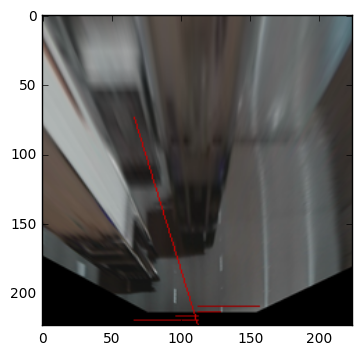

In [179]:
np.set_printoptions(suppress=True)
display_affordances(source,data['train']['images'],train_pred,resized=224, num=1)

In [171]:
from keras.models import load_model

In [172]:
model2=load_model('models/dd_resnet50_1k_train_finetuned.h5')

In [175]:
test_pred2 = model2.predict(data['test']['image_data'])

In [47]:
import json

In [48]:
a=[{'foo':3,'posfpsofpsd':5,'sdhdfhdh':'2342309489328493274983274982374983827 92347 9823479 83274932874'},{'foo':3,'posfpsofpsd':5,'sdhdfhdh':'2342309489328493274983274982374983827 92347 9823479 83274932874'},{'foo':3,'posfpsofpsd':5,'sdhdfhdh':'2342309489328493274983274982374983827 92347 9823479 83274932874'}]

In [59]:
with open('foo', 'w') as f:
    json.dump( a.tolist(), f)

In [55]:
cat foo

{"foo": 3, "sdhdfhdh": "2342309489328493274983274982374983827 92347 9823479 83274932874", "posfpsofpsd": 5}
{"foo": 3, "sdhdfhdh": "2342309489328493274983274982374983827 92347 9823479 83274932874", "posfpsofpsd": 5}
{"foo": 3, "sdhdfhdh": "2342309489328493274983274982374983827 92347 9823479 83274932874", "posfpsofpsd": 5}


In [56]:
a=np.array([2,3,5])

In [57]:
a.tolist()


[2, 3, 5]